In [1]:
import pandas as pd

In [2]:
raw = pd.read_csv("Regression_BSD_hour.csv")

In [3]:
with open("Regression_BSD_Readme.txt", "r") as readme:
    print(readme.read())

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

# Show the raw data

In [4]:
raw

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
raw.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Split the data into training and test data

In [6]:
all_days = len(raw) // 24
print("Total observations", len(raw))
print("Total number of days", all_days)

days_for_training = int(all_days * 0.7)
hours_for_training = days_for_training*24

X_train = raw[0:hours_for_training]
X_test = raw[hours_for_training:]

y_train = X_train['cnt']
y_test = X_test['cnt']


print("Observations for training", X_train.shape)
print("Observations for testing", X_test.shape)


Total observations 17379
Total number of days 724
Observations for training (12144, 17)
Observations for testing (5235, 17)


In [7]:
X_train

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12139,12140,2012-05-26,2,1,5,0,0,6,0,1,0.64,0.5758,0.83,0.1642,18,98,116
12140,12141,2012-05-26,2,1,5,1,0,6,0,1,0.64,0.5758,0.83,0.1343,18,64,82
12141,12142,2012-05-26,2,1,5,2,0,6,0,1,0.64,0.5758,0.89,0.1343,9,55,64
12142,12143,2012-05-26,2,1,5,3,0,6,0,1,0.62,0.5606,0.88,0.1045,9,22,31


In [8]:
y_train

0         16
1         40
2         32
3         13
4          1
        ... 
12139    116
12140     82
12141     64
12142     31
12143      2
Name: cnt, Length: 12144, dtype: int64

In [9]:
X_test

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12144,12145,2012-05-26,2,1,5,5,0,6,0,1,0.62,0.5758,0.83,0.2537,0,10,10
12145,12146,2012-05-26,2,1,5,6,0,6,0,1,0.62,0.5606,0.88,0.1940,6,25,31
12146,12147,2012-05-26,2,1,5,7,0,6,0,2,0.62,0.5606,0.88,0.1642,10,44,54
12147,12148,2012-05-26,2,1,5,8,0,6,0,1,0.64,0.5909,0.78,0.1343,38,103,141
12148,12149,2012-05-26,2,1,5,9,0,6,0,1,0.64,0.5758,0.83,0.1940,97,192,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [10]:
y_test

12144     10
12145     31
12146     54
12147    141
12148    289
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 5235, dtype: int64

# Visualise the data

In [11]:
import matplotlib.pyplot as plt


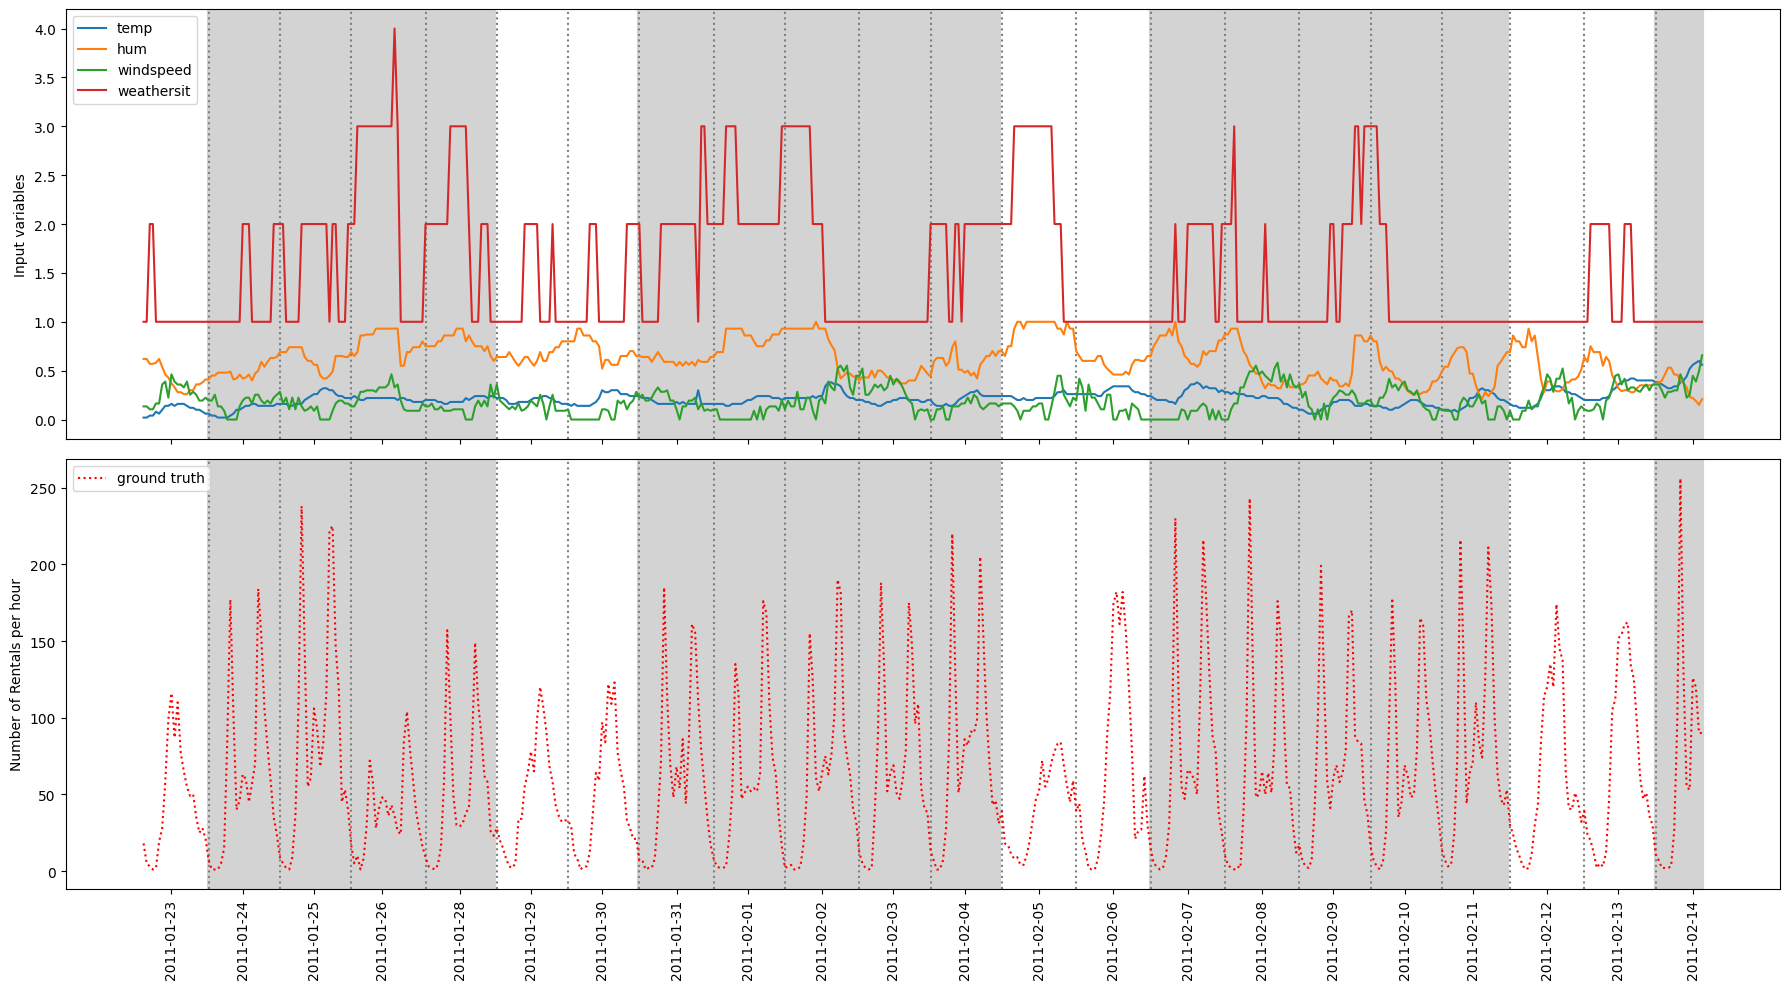

In [16]:
def plot_data(X, y, first_day = 3*7, duration_days = 3*7):
    s = first_day*24         # start hour
    e = s+duration_days*24   # end hour
    
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(18,10), sharex=True)
        
    # fill the background of the working days
    for x,v in X['workingday'][s:e].items():
        if v==1: 
            ax0.axvline(x, lw=3, c='lightgrey')
            ax1.axvline(x, lw=3, c='lightgrey')


    mid_day_indexes = []
    # drawing lines between the days
    for x,v in X['hr'][s:e].items():
        if v==0: 
            ax0.axvline(x, ls=':', c='grey')
            ax1.axvline(x, ls=':', c='grey')
        if v==12:  
            mid_day_indexes.append(x) 

    for c in [
        'temp', 'hum', 'windspeed', 'weathersit', 
        # 'atemp', 'season', 'workingday', 'instant', 'dteday', 'weekday', 
        # 'yr', 'mnth', 'hr', 'holiday', 'casual', 'registered',  'cnt'
    ]: ax0.plot(X[c][s:e], label=c)

    ax0.legend(loc="upper left")
    ax0.set_ylabel('Input variables')
    
    ax1.plot(y[s:e], 'r:', label="ground truth")
    ax1.legend(loc="upper left")
    ax1.set_ylabel('Number of Rentals per hour')
    
    ax1.set_xticks(mid_day_indexes)
    ax1.xaxis.set_ticklabels([X['dteday'][i] for i in mid_day_indexes], rotation=90)
    
    plt.tight_layout()
    # plt.savefig('plot.pdf')
    plt.show()
    
plot_data(X_train, y_train)